In [358]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import f
import scipy.stats as stats
from scipy.stats import norm
from scipy.stats import levene
from warnings import filterwarnings 
filterwarnings("ignore")
from scipy.stats import ttest_1samp, ttest_ind
from statsmodels.stats.power import ttest_power
from statsmodels.formula.api import ols
from statsmodels.stats.anova import _get_covariance,anova_lm

# Problem 1

## 1.1) Ans:

Total number of players injured (145) / Total number of players (235) * 100 = **61.70%**

The probability for which a randomly chosen player would suffer an injury is **61.70%.**

## 1.2) Ans:

Forward 94/235 +  Winger 29/235 = 123/235  = **52.34%**

The probability that a player is a forward or a winger is **52.34%.**

## 1.3) Ans:

striker position and has a foot injury (45) / Total number of players (235) = **19.14%**

The probability that a randomly chosen player plays in a striker position and has a foot injury is **19.14%.**

## 1.4) Ans:

Injured striker (45) / Total number of injured players (145) *100 = **31.03%**

The probability that a randomly chosen injured player is a striker is **31.03%.**

## 1.5) Ans:

Forward 56/145 +  Attacking Midfielder 24/145 = 80/145  = **55.17%**

The probability that a randomly chosen injured player is either a forward or an attacking midfielder is **55.17%.**

# Problem 2

### Probability of radiation leak given Fire
P(Radiation Leak | Fire) = 20% = 0.2    
### Probability of radiation leak given Mechanical failure
P(Radiation Leak | Mechanical failure) = 50% = 0.5         
### Probability of radiation leak given Human error
P(Radiation Leak | Human error) = 10% = 0.1                                                        


### Probability of radiation leak occurring simultaneously with a fire
P(Radiation Leak ∩ Fire) = 0.1% = 0.001
### Probability of radiation leak occurring simultaneously with a Mechanical failure
P(Radiation Leak ∩ Mechanical failure) = 0.15% = 0.0015
### Probability of radiation leak occurring simultaneously with a Human error
P(Radiation Leak ∩ Human error) = 0.12% = 0.0012

## 2.1) Ans:

#### P(A|B) = P(A ∩ B) / P(B)

#### Therefore, P(B) = P(A ∩ B) / P(A|B)

### Probability of a Fire

Prob of fire P(F) = P(Radiation Leak ∩ Fire) / P(Radiation Leak | Fire)

Prob of fire P(F) = 0.001 / 0.2 = **0.005 or 0.5%**

### Probability of a Mechanical failure

Prob of Mechanical failure P(M) = P(Radiation Leak ∩ Mechanical failure) / P(Radiation Leak | Mechanical failure)

Prob of Mechanical failure P(M) = 0.0015 / 0.5 = **0.003 or 0.3%**

### Probability of a Human error

Prob of Human error P(H) = P(Radiation Leak ∩ Human error) / P(Radiation Leak | Human error)

Prob of Human error P(H) = 0.0012 / 0.1 = **0.012 or 1.2%**

## 2.2) Ans:

### Probability of a Radiation Leak
Prob of Radiation Leak P(R) = P(Radiation Leak ∩ Fire) + P(Radiation Leak ∩ Mechanical failure) + P(Radiation Leak ∩ Human error)

Prob of Radiation Leak P(R) = 0.001 + 0.0015 + 0.0012 = **0.0037 or 0.37%**

## 2.3) Ans:

#### P(A|B) = P(A ∩ B) / P(B)

### Probability that it has been caused by a Fire

P(Fire | Radiation Leak) = P(Radiation Leak ∩ Fire) / P(Radiation Leak)

P(Fire | Radiation Leak) = 0.001 / 0.0037 = **0.27 or 27.03%**

### Probability that it has been caused by a Mechanical failure

P(Mechanical failure | Radiation Leak) = P(Radiation Leak ∩ Mechanical failure) / P(Radiation Leak)

P(Mechanical failure | Radiation Leak) = 0.0015 / 0.0037 = **0.41 or 40.54%**

### Probability that it has been caused by a Human error

P(Human error | Radiation Leak) = P(Radiation Leak ∩ Human error) / P(Radiation Leak)

P(Human error | Radiation Leak) = 0.0012 / 0.0037 = **0.32 or 32.43%**

# Problem 3

In [359]:
from scipy.stats import norm
import math
mu = 5
sigma = 1.5 

## 3.1) Ans:

In [360]:
# proportion of the gunny bags having a breaking strength less than 3.17 kg per sq cm
z=(3.17-mu)/sigma
prop_less_than_3_17 = stats.norm.cdf(z)
print('The proportion of the gunny bags having a breaking strength less than 3.17 kg per sq cm is', round(prop_less_than_3_17, 2))

The proportion of the gunny bags having a breaking strength less than 3.17 kg per sq cm is 0.11


In [361]:
x1 = mu + sigma * np.random.randn(1000)
data = pd.DataFrame({'x1': x1})
data.head(3)

,x1
0,3.099693
1,4.755505
2,7.108906


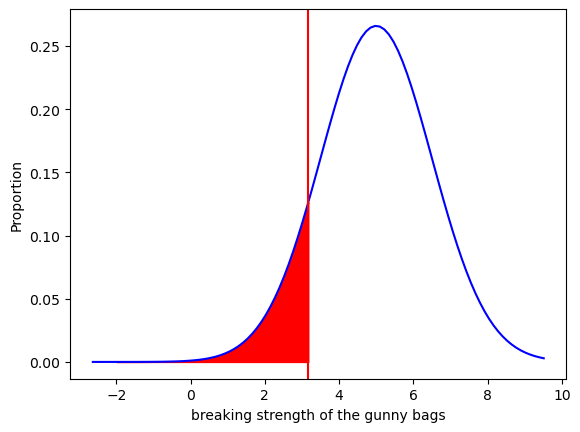

In [362]:
density=pd.DataFrame()
density['x']= np.linspace(data['x1'].min() - 2.01, data['x1'].max() +0.01, 100)
density['pdf']= norm.pdf(density['x'], mu, sigma)

plt.plot(density['x'], density['pdf'], color='b')
plt.axvline(x=3.17, c='red')                               
x2= np.linspace(density['x'].min(), 3.17, 50)                               

px=np.arange(-2,3.17,0.001)
iq=stats.norm(mu,sigma)
plt.fill_between(px,iq.pdf(px),color='r')
plt.xlabel("breaking strength of the gunny bags")
plt.ylabel("Proportion");

## 3.2) Ans:

In [363]:
# proportion of the gunny bags having a breaking strength at least 3.6 kg per sq cm
z=(3.6-mu)/sigma
prop_atleast_3_6 = 1 - stats.norm.cdf(z)
print('The proportion of the gunny bags having a breaking strength at least 3.6 kg per sq cm is', round(prop_atleast_3_6, 2))

The proportion of the gunny bags having a breaking strength at least 3.6 kg per sq cm is 0.82


In [364]:
x3 = mu + sigma * np.random.randn(1000)
data_1 = pd.DataFrame({'x3': x3})
data_1.head(3)

,x3
0,4.408121
1,4.039845
2,6.662948


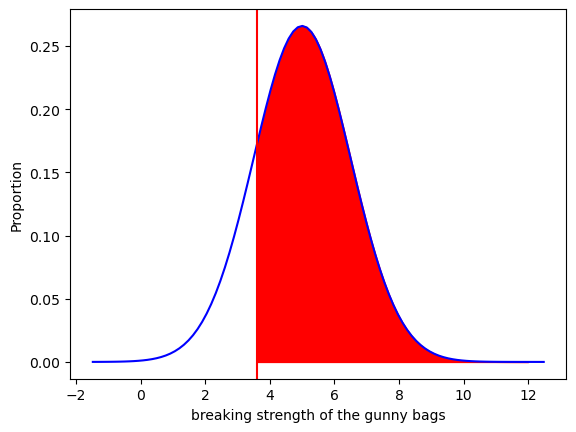

In [365]:
density=pd.DataFrame()
density['x']= np.linspace(data_1['x3'].min() - 2.01, data_1['x3'].max() +2.01, 100)
density['pdf']= norm.pdf(density['x'], mu, sigma)

plt.plot(density['x'], density['pdf'], color='b')
plt.axvline(x=3.6, c='red')                               
x4= np.linspace(density['x'].min(), 3.6, 50)                               

px=np.arange(3.6, 12 ,0.001)
iq=stats.norm(mu,sigma)
plt.fill_between(px,iq.pdf(px),color='r')
plt.xlabel("breaking strength of the gunny bags")
plt.ylabel("Proportion");

## 3.3) Ans:

In [366]:
# proportion of the gunny bags having a breaking strength between 5 and 5.5 kg per sq cm.
z1=(5-mu)/sigma
z2=(5.5-mu)/sigma
prop_between_5_and_5_5 = stats.norm.cdf(z2)-stats.norm.cdf(z1)
print('The proportion of the gunny bags having a breaking strength between 5 and 5.5 kg per sq cm is', round(prop_between_5_and_5_5, 2))

The proportion of the gunny bags having a breaking strength between 5 and 5.5 kg per sq cm is 0.13


In [367]:
x5 = mu + sigma * np.random.randn(1000)
data_2 = pd.DataFrame({'x5': x5})
data_2.head(3)

,x5
0,4.204373
1,5.900639
2,4.112199


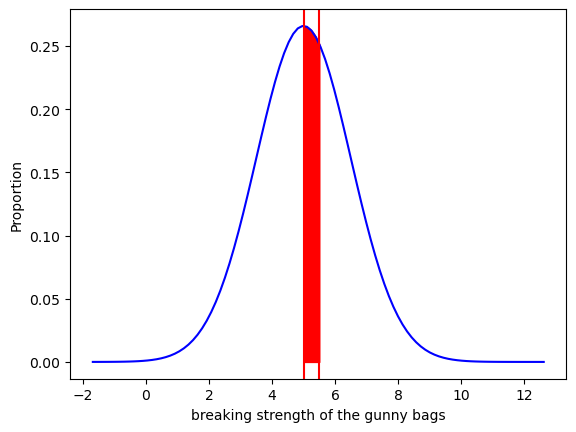

In [368]:
density=pd.DataFrame()
density['x']= np.linspace(data_2['x5'].min() - 2.01, data_2['x5'].max() +2.01, 100)
density['pdf']= norm.pdf(density['x'], mu, sigma)

plt.plot(density['x'], density['pdf'], color='b')
plt.axvline(x=5, c='red') 
plt.axvline(x=5.5, c='red') 
x6= np.linspace(density['x'].min(), 5 , 50)                               

px=np.arange(5, 5.5 ,0.001)
iq=stats.norm(mu,sigma)
plt.fill_between(px,iq.pdf(px),color='r')
plt.xlabel("breaking strength of the gunny bags")
plt.ylabel("Proportion");

## 3.4) Ans:

In [369]:
# proportion of the gunny bags having a breaking strength NOT between 3 and 7.5 kg per sq cm.
z3=(3-mu)/sigma
z4=(7.5-mu)/sigma
prop_not_between_3_and_7_5 = stats.norm.cdf(z3) + 1 - stats.norm.cdf(z4)
print('The proportion of the gunny bags having a breaking strength NOT between 3 and 7.5 kg per sq cm is', round(prop_not_between_3_and_7_5, 2))

The proportion of the gunny bags having a breaking strength NOT between 3 and 7.5 kg per sq cm is 0.14


In [370]:
x7 = mu + sigma * np.random.randn(1000)
data_3 = pd.DataFrame({'x7': x7})
data_3.head(3)

,x7
0,5.002897
1,6.503593
2,7.371605


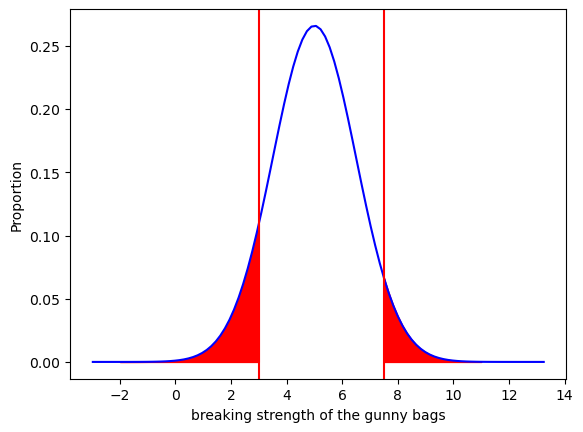

In [371]:
density=pd.DataFrame()
density['x']= np.linspace(data_3['x7'].min() - 3.01, data_3['x7'].max() +3.01, 100)
density['pdf']= norm.pdf(density['x'], mu, sigma)

plt.plot(density['x'], density['pdf'], color='b')
plt.axvline(x=3, c='red') 
plt.axvline(x=7.5, c='red') 
x6= np.linspace(density['x'].min(), 5 , 50)                               

px=np.arange(7.5, 11 ,0.001)
iq=stats.norm(mu,sigma)
plt.fill_between(px,iq.pdf(px),color='r')
px1=np.arange(-2, 3 ,0.001)
iq1=stats.norm(mu,sigma)
plt.fill_between(px1,iq1.pdf(px1),color='r')
plt.xlabel("breaking strength of the gunny bags")
plt.ylabel("Proportion");

# Problem 4

In [372]:
mu = 77
sigma = 8.5 

## 4.1) Ans:

In [373]:
# probability that a randomly chosen student gets a grade below 85
z=(85-mu)/sigma
prob_less_than_85 = stats.norm.cdf(z)
print('The probability that a randomly chosen student gets a grade below 85 on this exam is', round(prob_less_than_85, 2))

The probability that a randomly chosen student gets a grade below 85 on this exam is 0.83


In [374]:
r1 = mu + sigma * np.random.randn(1000)
data = pd.DataFrame({'r1': r1})
data.head(3)

,r1
0,81.093611
1,77.282571
2,73.199505


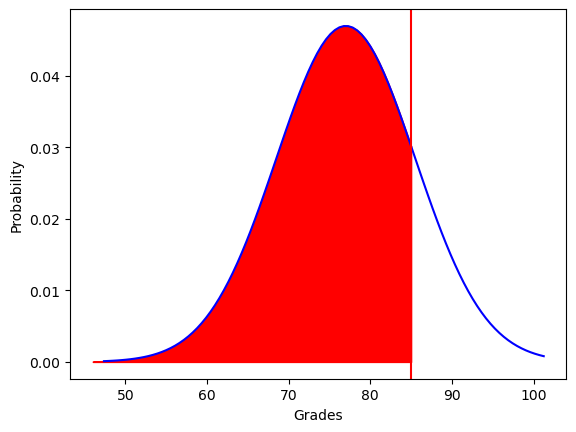

In [375]:
density=pd.DataFrame()
density['x']= np.linspace(data['r1'].min() - 0.01, data['r1'].max() +0.01, 100)
density['pdf']= norm.pdf(density['x'], mu, sigma)

plt.plot(density['x'], density['pdf'], color='b')
plt.axvline(x=85, c='red')                               
x1= np.linspace(density['x'].min(), 85, 50)                               

px=np.arange(46, 85, 0.001)
iq=stats.norm(mu,sigma)
plt.fill_between(px,iq.pdf(px),color='r')
plt.xlabel("Grades")
plt.ylabel("Probability");

## 4.2) Ans:

In [376]:
# the probability that a randomly selected student scores between 65 and 87
z1=(65-mu)/sigma
z2=(87-mu)/sigma
prob_between_65_and_87 = stats.norm.cdf(z2)-stats.norm.cdf(z1)
print('The probability that a randomly selected student scores between 65 and 87 is', round(prob_between_65_and_87, 2))

The probability that a randomly selected student scores between 65 and 87 is 0.8


In [377]:
r2 = mu + sigma * np.random.randn(1000)
data_1 = pd.DataFrame({'r2': r2})
data_1.head(3)

,r2
0,72.977435
1,64.753207
2,70.585287


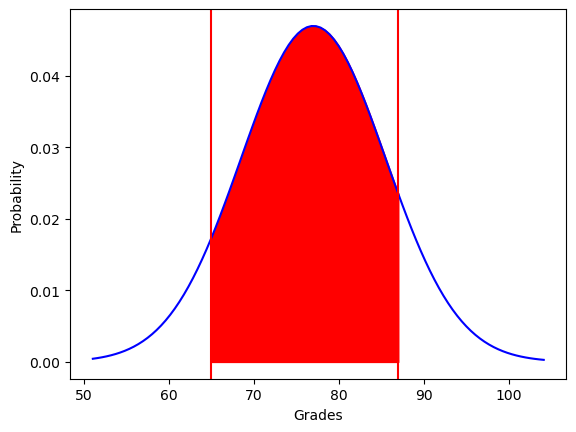

In [378]:
density=pd.DataFrame()
density['x']= np.linspace(data_1['r2'].min() - 2.01, data_1['r2'].max() +2.01, 100)
density['pdf']= norm.pdf(density['x'], mu, sigma)

plt.plot(density['x'], density['pdf'], color='b')
plt.axvline(x=65, c='red') 
plt.axvline(x=87, c='red') 
x2= np.linspace(density['x'].min(), 65 , 50)                               

px=np.arange(65, 87 ,0.001)
iq=stats.norm(mu,sigma)
plt.fill_between(px,iq.pdf(px),color='r')
plt.xlabel("Grades")
plt.ylabel("Probability");

## 4.3) Ans:

In [379]:
# the passing cut-off so that 75% of the students clear the exam
# We can try checking for the below 25% of students
passing_cutoff=stats.norm.ppf(0.25, mu,sigma)
print('The passing cut-off so that 75% of the students clear the exam is', round(passing_cutoff, 2))

The passing cut-off so that 75% of the students clear the exam is 71.27


In [380]:
r3 = mu + sigma * np.random.randn(1000)
data_2 = pd.DataFrame({'r3': r3})
data_2.head(3)

,r3
0,72.450357
1,93.181761
2,77.984452


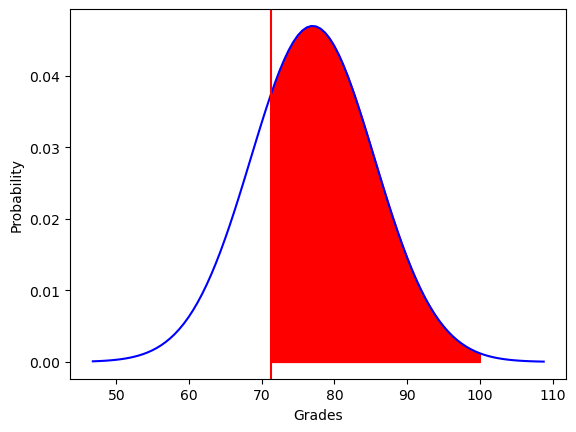

In [381]:
density=pd.DataFrame()
density['x']= np.linspace(data_2['r3'].min() - 0.01, data_2['r3'].max() +0.01, 100)
density['pdf']= norm.pdf(density['x'], mu, sigma)

plt.plot(density['x'], density['pdf'], color='b')
plt.axvline(x=71.27, c='red')                               
x3= np.linspace(density['x'].min(), 71.27, 50)                               

px=np.arange(71.27, 100 ,0.001)
iq=stats.norm(mu,sigma)
plt.fill_between(px,iq.pdf(px),color='r')
plt.xlabel("Grades")
plt.ylabel("Probability");

# Problem 5

mu = 150

n = 75

Alpha = 0.05

In [382]:
df=pd.read_csv("Zingaro_Company.csv")
df.head(2)

,Unpolished,Treated and Polished
0,164.481713,133.209393
1,154.307045,138.482771


In [383]:
df.shape

(75, 2)

## 5.1) Ans:

Ho = unpolished stones may be suitable for printing i.e., >= 150

Ha = unpolished stones may not be suitable for printing i.e., < 150

In [384]:
# As standard deviation of population not known, we can opt t test;   t test = (x_bar - mu) / (s/np.sqrt(n))

df.describe()

,Unpolished,Treated and Polished
count,75.000000,75.000000
mean,134.110527,147.788117
std,33.041804,15.587355
min,48.406838,107.524167
25%,115.329753,138.268300
50%,135.597121,145.721322
75%,158.215098,157.373318
max,200.161313,192.272856


### i) Unpolished t test

In [385]:
# critical value of the t test from the t table
cv = stats.t.ppf(0.05, 74)
cv

-1.665706892645352

In [386]:
# T statistic and p value

stats.ttest_1samp(df, 150)

TtestResult(statistic=array([-4.1646296 , -1.22891066]), pvalue=array([8.34257399e-05, 2.22998968e-01]), df=array([74, 74]))

### **Unpolished**

### T test statistic = - 4.1646296

### p value = 8.34257399e-05

In [387]:
if 8.34257399e-05 < 0.05:
    print('Reject the null hypothesis')
else:
    print('Fail to reject the null hypothesis')

Reject the null hypothesis


## As p value < α, we can reject the null hypothesis with 95% confidence. 

## Zingaro is justified in this case i.e., unpolished stones are not suitable for printing and has Brinell's hardness index less than 150.

#### Additionally,

### ii)Treated and Polished

Ho = Polished stone surface have a Brinell's hardness index of at least 150 (>=150)

Ha = Polished stone surface DO NOT have a Brinell's hardness index of at least 150 (<150)

In [388]:
# critical value of the t test from the t table
cv = stats.t.ppf(0.05, 74)
cv

-1.665706892645352

In [389]:
# T statistic and p value

stats.ttest_1samp(df, 150)

TtestResult(statistic=array([-4.1646296 , -1.22891066]), pvalue=array([8.34257399e-05, 2.22998968e-01]), df=array([74, 74]))

### **polished**

### T test statistic = - 1.22891066

### p value = 2.22998968e-01

In [390]:
if 2.22998968e-01 < 0.05:
    print('Reject the null hypothesis')
else:
    print('Fail to reject the null hypothesis')

Fail to reject the null hypothesis


## As p value > α, we Fail to  reject the null hypothesis.  i.e., Polished stone surface has a Brinell's hardness index of at least 150.

## 5.2) Ans:

#### 2 tailed test

Ho = mean hardness of the polished and unpolished stones are the same

Ha = mean hardness of the polished and unpolished stones are NOT the same

In [391]:
dataframe=df.copy()
dataframe.columns = [i.rstrip() for i in dataframe.columns]
dataframe.head(2)

,Unpolished,Treated and Polished
0,164.481713,133.209393
1,154.307045,138.482771


In [392]:
t_stat, p_value = ttest_ind(dataframe['Unpolished'],dataframe['Treated and Polished'])
print('t_statistic', t_stat)
print('p value', p_value)

t_statistic -3.2422320501414053
p value 0.0014655150194628353


In [393]:
if p_value < 0.05:
    print('Reject the null hypothesis')
else:
    print('Fail to reject the null hypothesis')

Reject the null hypothesis


## As p value < α, we can Reject the null hypothesis.  i.e., Mean hardness of the polished and unpolished stones are NOT the same in this case.

# Problem 6

## 6) Ans:

In [394]:
df_n=pd.read_csv("Aquarius_gym.csv")
df_n.head(2)

,Sr no.,Before,After
0,1,39,44
1,2,25,25


In [395]:
df_n.shape

(100, 3)

In [396]:
df_n.describe()

,Sr no.,Before,After
count,100.000000,100.000000,100.000000
mean,50.500000,26.940000,32.490000
std,29.011492,8.806357,8.779562
min,1.000000,3.000000,10.000000
25%,25.750000,21.750000,26.000000
50%,50.500000,28.000000,34.000000
75%,75.250000,32.250000,39.000000
max,100.000000,47.000000,51.000000


#### Ho = training will not make any difference (<=5)

#### Ha = training will make a difference of more than 5 (>5)

α = 0.05

In [397]:
t_stat, p_value = stats.ttest_rel (df_n['Before'],df_n['After'])
print('t_statistic', t_stat)
print('p value', p_value/2)             #pvalue for a one-tailed test

t_statistic -19.322619811082458
p value 1.1460209626255983e-35


In [398]:
if p_value < 0.05:
    print('Reject the null hypothesis')
else:
    print('Fail to reject the null hypothesis')

Reject the null hypothesis


## As p value < α, we can Reject the null hypothesis.  i.e., the training will make a difference of more than 5 push-ups, as compared to when he/she enrolled in the program.

# Problem 7

In [399]:
df = pd.read_excel('Dental Hardness data.xlsx')
df.columns


Index(['Dentist', 'Method', 'Alloy', 'Temp', 'Response', 'Unnamed: 5',
       'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10',
       'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13'],
      dtype='object')

In [400]:
df.drop(['Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10',
       'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13'], axis=1, inplace = True)
df.drop([90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106], inplace = True)

In [401]:
df_new = df.copy()
df_new.head(2)

,Dentist,Method,Alloy,Temp,Response
0,1.0,1.0,1.0,1500.0,813.0
1,1.0,1.0,1.0,1600.0,792.0


In [402]:
df_new.shape

(90, 5)

In [403]:
df_new.describe().T

,count,mean,std,min,25%,50%,75%,max
Dentist,90.0,3.000000,1.422136,1.0,2.0,3.0,4.0,5.0
Method,90.0,2.000000,0.821071,1.0,1.0,2.0,3.0,3.0
Alloy,90.0,1.500000,0.502801,1.0,1.0,1.5,2.0,2.0
Temp,90.0,1600.000000,82.107083,1500.0,1500.0,1600.0,1700.0,1700.0
Response,90.0,741.777778,145.767845,289.0,698.0,767.0,824.0,1115.0


In [404]:
df_new.isnull().sum()

Dentist     0
Method      0
Alloy       0
Temp        0
Response    0
dtype: int64

In [405]:
# Alloy 1
Alloy1 = df_new [df_new['Alloy'] == 1]
Alloy1.head(2)

,Dentist,Method,Alloy,Temp,Response
0,1.0,1.0,1.0,1500.0,813.0
1,1.0,1.0,1.0,1600.0,792.0


In [406]:
Alloy1.shape

(45, 5)

In [407]:
# Alloy 2
Alloy2 = df_new [df_new['Alloy'] == 2]
Alloy2.head(2)

,Dentist,Method,Alloy,Temp,Response
3,1.0,1.0,2.0,1500.0,907.0
4,1.0,1.0,2.0,1600.0,792.0


In [408]:
Alloy2.shape

(45, 5)

## 7.1) Ans:

### i) Alloy 1:

Ho = There is NO difference among the dentists on the implant hardness

Ha = There is difference among the dentists on the implant hardness

In [409]:
Alloy1.Dentist = pd.Categorical(Alloy1.Dentist)

In [410]:
Alloy1.Dentist.value_counts()

1.0    9
2.0    9
3.0    9
4.0    9
5.0    9
Name: Dentist, dtype: int64

In [411]:
Dentist_1 = Alloy1[Alloy1['Dentist']==1]['Response']
Dentist_2 = Alloy1[Alloy1['Dentist']==2]['Response']
Dentist_3 = Alloy1[Alloy1['Dentist']==3]['Response']
Dentist_4 = Alloy1[Alloy1['Dentist']==4]['Response']
Dentist_5 = Alloy1[Alloy1['Dentist']==5]['Response']

In [412]:
print(stats.shapiro([Dentist_5]))

ShapiroResult(statistic=0.8534296751022339, pvalue=0.08127813786268234)


### Normally distributed as all p values are  > 0.05

In [413]:
print(stats.levene(Dentist_1,Dentist_2,Dentist_3,Dentist_4,Dentist_5))

LeveneResult(statistic=1.3847146992797106, pvalue=0.2565537418543795)


### Variances are equal as p value is  > 0.05

## One Way Anova

In [414]:
formula = 'Response ~ C(Dentist)'
model = ols(formula, Alloy1).fit()
aov_table = anova_lm(model)
print(aov_table)

              df         sum_sq       mean_sq         F    PR(>F)
C(Dentist)   4.0  106683.688889  26670.922222  1.977112  0.116567
Residual    40.0  539593.555556  13489.838889       NaN       NaN


In [415]:
if 0.116567 < 0.05:
    print('Reject the null hypothesis')
else:
    print('Fail to reject the null hypothesis')

Fail to reject the null hypothesis


### As p value > α, we Fail to Reject the null hypothesis.  i.e.,  There is NO difference among the dentists on the implant hardness of Alloy 1 type.

### ii) Alloy 2:

Ho = There is NO difference among the dentists on the implant hardness

Ha = There is difference among the dentists on the implant hardness

In [416]:
Alloy2.Dentist = pd.Categorical(Alloy2.Dentist)

In [417]:
Alloy2.Dentist.value_counts()

1.0    9
2.0    9
3.0    9
4.0    9
5.0    9
Name: Dentist, dtype: int64

In [418]:
Dentist_1 = Alloy2[Alloy2['Dentist']==1]['Response']
Dentist_2 = Alloy2[Alloy2['Dentist']==2]['Response']
Dentist_3 = Alloy2[Alloy2['Dentist']==3]['Response']
Dentist_4 = Alloy2[Alloy2['Dentist']==4]['Response']
Dentist_5 = Alloy2[Alloy2['Dentist']==5]['Response']

In [419]:
print(stats.shapiro([Dentist_4]))

ShapiroResult(statistic=0.7613219022750854, pvalue=0.007332688197493553)


### Normally distributed as all p values are  > 0.05, except Dentist_4 whose p value is less when compared with Shapiro test. 

In [420]:
print(stats.levene(Dentist_1,Dentist_2,Dentist_3,Dentist_4,Dentist_5))

LeveneResult(statistic=1.4456166464566966, pvalue=0.23686777576324952)


### Variances are equal as p value is  > 0.05

## One Way Anova

In [421]:
formula = 'Response ~ C(Dentist)'
model = ols(formula, Alloy2).fit()
aov_table = anova_lm(model)
print(aov_table)

              df        sum_sq       mean_sq         F    PR(>F)
C(Dentist)   4.0  5.679791e+04  14199.477778  0.524835  0.718031
Residual    40.0  1.082205e+06  27055.122222       NaN       NaN


In [422]:
if 0.718031 < 0.05:
    print('Reject the null hypothesis')
else:
    print('Fail to reject the null hypothesis')

Fail to reject the null hypothesis


### As p value > α, we Fail to Reject the null hypothesis.  i.e.,  There is NO difference among the dentists on the implant hardness of Alloy 2 type as well.

## 7.2) Ans:


Alloy 2: Normally distributed as all p values are  > 0.05, except Dentist_4 whose p value is less when compared with Shapiro test. 

## 7.3) Ans:


#### One Way Anova to check whether implant hardness depends on dentist.

In [423]:
formula = 'Response ~ C(Dentist)'
model = ols(formula, df_new).fit()
aov_table = anova_lm(model)
print(aov_table)

              df        sum_sq       mean_sq         F    PR(>F)
C(Dentist)   4.0  1.577946e+05  39448.638889  1.934537  0.112066
Residual    85.0  1.733301e+06  20391.776471       NaN       NaN


### We are about 89% sure that the implant hardness depends on dentists.

### i) Alloy 1:

Ho = implant hardness depends on dentists

Ha = implant hardness Does NOT depend on dentists

## One Way Anova

In [424]:
Dentist_1 = Alloy1[Alloy1['Dentist']==1]['Response']
Dentist_2 = Alloy1[Alloy1['Dentist']==2]['Response']
Dentist_3 = Alloy1[Alloy1['Dentist']==3]['Response']
Dentist_4 = Alloy1[Alloy1['Dentist']==4]['Response']
Dentist_5 = Alloy1[Alloy1['Dentist']==5]['Response']

In [425]:
print(stats.shapiro([Dentist_5]))

ShapiroResult(statistic=0.8534296751022339, pvalue=0.08127813786268234)


In [426]:
print(stats.levene(Dentist_1,Dentist_2,Dentist_3,Dentist_4,Dentist_5))

LeveneResult(statistic=1.3847146992797106, pvalue=0.2565537418543795)


In [427]:
formula = 'Response ~ C(Dentist)'
model = ols(formula, Alloy1).fit()
aov_table = anova_lm(model)
print(aov_table)

              df         sum_sq       mean_sq         F    PR(>F)
C(Dentist)   4.0  106683.688889  26670.922222  1.977112  0.116567
Residual    40.0  539593.555556  13489.838889       NaN       NaN


In [428]:
if 0.116567 < 0.05:
    print('Reject the null hypothesis')
else:
    print('Fail to reject the null hypothesis')

Fail to reject the null hypothesis


### As p value > α, we Fail to Reject the null hypothesis.  i.e.,  implant hardness depends on dentists of Alloy 1 type.

In [429]:
# Homogeneous
print(levene(Dentist_1, Dentist_2, center = 'mean', proportiontocut = 0.05))
print(levene(Dentist_2, Dentist_3, center = 'mean', proportiontocut = 0.05))
print(levene(Dentist_3, Dentist_4, center = 'mean', proportiontocut = 0.05))
print(levene(Dentist_1, Dentist_4, center = 'mean', proportiontocut = 0.05))
print(levene(Dentist_1, Dentist_3, center = 'mean', proportiontocut = 0.05))
print(levene(Dentist_2, Dentist_4, center = 'mean', proportiontocut = 0.05))

LeveneResult(statistic=1.0083276455136205, pvalue=0.3302493986457353)
LeveneResult(statistic=0.2594088332769145, pvalue=0.6174788111170947)
LeveneResult(statistic=3.5685575718334817, pvalue=0.07714709892915635)
LeveneResult(statistic=2.853155520544538, pvalue=0.11058377527264443)
LeveneResult(statistic=0.21272464820239148, pvalue=0.6508480492345458)
LeveneResult(statistic=4.42770301932119, pvalue=0.051524395988049164)


## All of the p values are above 0.05, hence, satisfies homogeneity.

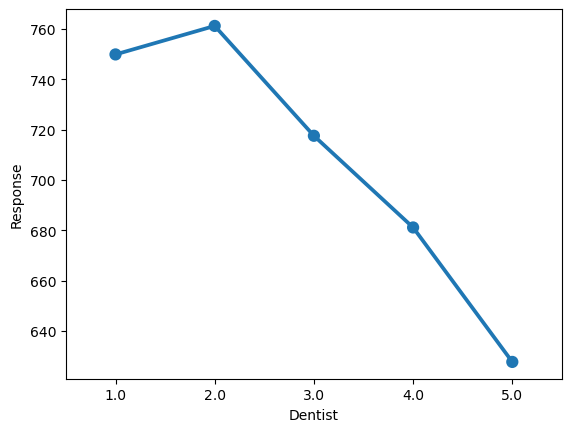

In [430]:
sns.pointplot(x='Dentist', y='Response', data=Alloy1, ci=None);

### Insights:


**Dentist 2 has the highest response rate when compared with other dentists.**

**Dentist 5 has least response rate.**

**Dentist 1 is the second highest when compared to response rate.**

**There is a decline in response rate from Dentist 3 onwards.**


### ii) Alloy 2:

Ho = implant hardness depends on dentists

Ha = implant hardness Does NOT depend on dentists

## One Way Anova

In [431]:
Dentist_1 = Alloy2[Alloy2['Dentist']==1]['Response']
Dentist_2 = Alloy2[Alloy2['Dentist']==2]['Response']
Dentist_3 = Alloy2[Alloy2['Dentist']==3]['Response']
Dentist_4 = Alloy2[Alloy2['Dentist']==4]['Response']
Dentist_5 = Alloy2[Alloy2['Dentist']==5]['Response']

In [432]:
print(stats.shapiro([Dentist_4]))

ShapiroResult(statistic=0.7613219022750854, pvalue=0.007332688197493553)


In [433]:
print(stats.levene(Dentist_1,Dentist_2,Dentist_3,Dentist_4,Dentist_5))

LeveneResult(statistic=1.4456166464566966, pvalue=0.23686777576324952)


In [434]:
formula = 'Response ~ C(Dentist)'
model = ols(formula, Alloy2).fit()
aov_table = anova_lm(model)
print(aov_table)

              df        sum_sq       mean_sq         F    PR(>F)
C(Dentist)   4.0  5.679791e+04  14199.477778  0.524835  0.718031
Residual    40.0  1.082205e+06  27055.122222       NaN       NaN


In [435]:
if 0.718031 < 0.05:
    print('Reject the null hypothesis')
else:
    print('Fail to reject the null hypothesis')

Fail to reject the null hypothesis


### As p value > α, we Fail to Reject the null hypothesis.  i.e.,  implant hardness depends on dentists of Alloy 2 type.

In [436]:
# Homogeneous
print(levene(Dentist_1, Dentist_2, center = 'mean', proportiontocut = 0.05))
print(levene(Dentist_2, Dentist_3, center = 'mean', proportiontocut = 0.05))
print(levene(Dentist_3, Dentist_4, center = 'mean', proportiontocut = 0.05))
print(levene(Dentist_1, Dentist_4, center = 'mean', proportiontocut = 0.05))
print(levene(Dentist_1, Dentist_3, center = 'mean', proportiontocut = 0.05))
print(levene(Dentist_2, Dentist_4, center = 'mean', proportiontocut = 0.05))

LeveneResult(statistic=0.8354199430344812, pvalue=0.374278746615896)
LeveneResult(statistic=1.8357379844263988, pvalue=0.1942740761463763)
LeveneResult(statistic=2.999556056709494, pvalue=0.1025181320923458)
LeveneResult(statistic=0.04122461805668294, pvalue=0.8416645477879323)
LeveneResult(statistic=2.391463988812606, pvalue=0.14154839434757432)
LeveneResult(statistic=1.2753897854782572, pvalue=0.2754058384083719)


## All of the p values are above 0.05, hence, satisfies homogeneity.


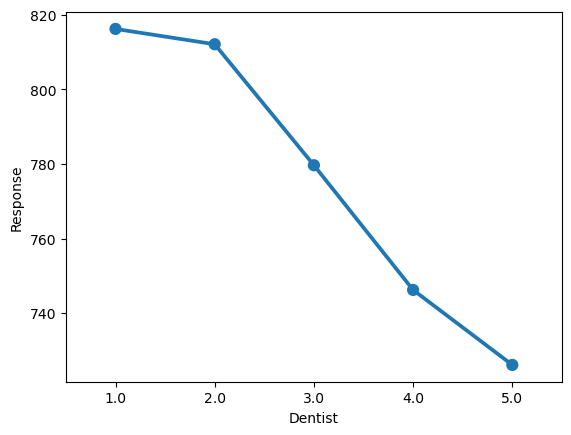

In [437]:
sns.pointplot(x='Dentist', y='Response', data=Alloy2, ci=None);

### Insights:

### Alloy 2

**Dentist 1 has the highest response rate when compared with other dentists.**

**Dentist 5 has least response rate.**

**There is a decline in response rate from Dentist 1 to 5.**


## CONCLUSION: DENTIST_3 and DENTIST_ 4 of ALLOY 1 type is a pair that differs.

## 7.4) Ans:


### i) Alloy 1:

#### methods

Ho = There is NO difference among the methods on the implant hardness

Ha = There is difference among the methods on the implant hardness

In [438]:
Alloy1.Method = pd.Categorical(Alloy1.Method)

In [439]:
Alloy1.Method.value_counts()

1.0    15
2.0    15
3.0    15
Name: Method, dtype: int64

In [440]:
Alloy1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45 entries, 0 to 86
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Dentist   45 non-null     category
 1   Method    45 non-null     category
 2   Alloy     45 non-null     float64 
 3   Temp      45 non-null     float64 
 4   Response  45 non-null     float64 
dtypes: category(2), float64(3)
memory usage: 1.8 KB


In [441]:
Method_1 = Alloy1[Alloy1['Method']==1]['Response']
Method_2 = Alloy1[Alloy1['Method']==2]['Response']
Method_3 = Alloy1[Alloy1['Method']==3]['Response']

In [442]:
print(stats.shapiro([Method_1]))
print(stats.shapiro([Method_2]))
print(stats.shapiro([Method_3]))

ShapiroResult(statistic=0.9183822870254517, pvalue=0.18198540806770325)
ShapiroResult(statistic=0.9732585549354553, pvalue=0.9030335545539856)
ShapiroResult(statistic=0.9114548563957214, pvalue=0.14254699647426605)


### Normally distributed as all p values are  > 0.05

In [443]:
print(stats.levene(Method_1,Method_2,Method_3))

LeveneResult(statistic=6.52140454403598, pvalue=0.0034160381460233975)


### There is a significant difference between the variances(pvalue < 0.05)

In [444]:
# Homogeneity
print(levene(Method_1, Method_2, center = 'mean', proportiontocut = 0.05))
print(levene(Method_2, Method_3, center = 'mean', proportiontocut = 0.05))
print(levene(Method_1, Method_3, center = 'mean', proportiontocut = 0.05))

LeveneResult(statistic=0.7823701778383629, pvalue=0.38394989601434304)
LeveneResult(statistic=12.595602614038445, pvalue=0.0013874210318934536)
LeveneResult(statistic=17.885496661260618, pvalue=0.00022668629079979953)


## Pairs that differ are 'Method_2 and Method_3' & 'Method_1 and Method_3' of ALLOY 1 type.

In [445]:
# One Way Anova
formula = 'Response ~ C(Method)'
model = ols(formula, Alloy1).fit()
aov_table = anova_lm(model)
print(aov_table)

             df         sum_sq       mean_sq         F    PR(>F)
C(Method)   2.0  148472.177778  74236.088889  6.263327  0.004163
Residual   42.0  497805.066667  11852.501587       NaN       NaN


### As p value < α, we can Reject the null hypothesis.  i.e.,  There is difference among the methods on the implant hardnessof Alloy 1 type.

### ii) Alloy 2:

#### methods

Ho = There is NO difference among the methods on the implant hardness

Ha = There is difference among the methods on the implant hardness

In [446]:
Alloy2.Method = pd.Categorical(Alloy2.Method)

In [447]:
Alloy2.Method.value_counts()

1.0    15
2.0    15
3.0    15
Name: Method, dtype: int64

In [448]:
Alloy2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45 entries, 3 to 89
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Dentist   45 non-null     category
 1   Method    45 non-null     category
 2   Alloy     45 non-null     float64 
 3   Temp      45 non-null     float64 
 4   Response  45 non-null     float64 
dtypes: category(2), float64(3)
memory usage: 1.8 KB


In [449]:
Method_1 = Alloy2[Alloy2['Method']==1]['Response']
Method_2 = Alloy2[Alloy2['Method']==2]['Response']
Method_3 = Alloy2[Alloy2['Method']==3]['Response']

In [450]:
print(stats.shapiro([Method_1]))
print(stats.shapiro([Method_2]))
print(stats.shapiro([Method_3]))

ShapiroResult(statistic=0.963810384273529, pvalue=0.7582374811172485)
ShapiroResult(statistic=0.755793035030365, pvalue=0.001051110913977027)
ShapiroResult(statistic=0.9021322131156921, pvalue=0.1025901660323143)


### Normally distributed as all p value is  > 0.05

In [451]:
print(stats.levene(Method_1,Method_2,Method_3))

LeveneResult(statistic=3.349707184158617, pvalue=0.04469269939158668)


### There is a significant difference between the variances(pvalue < 0.05)

In [452]:
# Homogeneity
print(levene(Method_1, Method_2, center = 'mean', proportiontocut = 0.05))
print(levene(Method_2, Method_3, center = 'mean', proportiontocut = 0.05))
print(levene(Method_1, Method_3, center = 'mean', proportiontocut = 0.05))

LeveneResult(statistic=0.6168634146720455, pvalue=0.4388110515152157)
LeveneResult(statistic=9.16579990950505, pvalue=0.005247242498057698)
LeveneResult(statistic=6.006658653135694, pvalue=0.020756407996500033)


## Pairs that differ are 'Method_2 and Method_3' & 'Method_1 and Method_3' of ALLOY 2 type.

In [453]:
# One Way Anova
formula = 'Response ~ C(Method)'
model = ols(formula, Alloy2).fit()
aov_table = anova_lm(model)
print(aov_table)

             df    sum_sq        mean_sq        F    PR(>F)
C(Method)   2.0  499640.4  249820.200000  16.4108  0.000005
Residual   42.0  639362.4   15222.914286      NaN       NaN


### As p value < α, we can Reject the null hypothesis.  i.e.,  There is difference among the methods on the implant hardnessof Alloy 2 type.

## 7.5) Ans:

### i) Alloy 1:

#### temperature

Ho = There is NO difference among the temperature level on the implant hardness

Ha = There is difference among the temperature level on the implant hardness

In [454]:
Alloy1.Temp = pd.Categorical(Alloy1.Temp)

In [455]:
Alloy1.Temp.value_counts()

1500.0    15
1600.0    15
1700.0    15
Name: Temp, dtype: int64

In [456]:
Alloy1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45 entries, 0 to 86
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Dentist   45 non-null     category
 1   Method    45 non-null     category
 2   Alloy     45 non-null     float64 
 3   Temp      45 non-null     category
 4   Response  45 non-null     float64 
dtypes: category(3), float64(2)
memory usage: 1.7 KB


In [457]:
Temp_1500 = Alloy1[Alloy1['Temp']==1500]['Response']
Temp_1600 = Alloy1[Alloy1['Temp']==1600]['Response']
Temp_1700 = Alloy1[Alloy1['Temp']==1700]['Response']

In [458]:
print(stats.shapiro([Temp_1500]))
print(stats.shapiro([Temp_1600]))
print(stats.shapiro([Temp_1700]))

ShapiroResult(statistic=0.7600352764129639, pvalue=0.001179991289973259)
ShapiroResult(statistic=0.9596877098083496, pvalue=0.6869674324989319)
ShapiroResult(statistic=0.7676342129707336, pvalue=0.0014549640472978354)


### Only Temp_1600 is normally distributed as p value is  > 0.05, Temp_1500 and Temp_1700 are not normally distributed as p value is < 0.05.

In [459]:
print(stats.levene(Temp_1500,Temp_1600,Temp_1700))

LeveneResult(statistic=0.26470963952464094, pvalue=0.7686994896007937)


### Variances are equal as p value is  > 0.05

In [460]:
# Homogeneity
print(levene(Temp_1500, Temp_1600, center = 'mean', proportiontocut = 0.05))
print(levene(Temp_1600, Temp_1700, center = 'mean', proportiontocut = 0.05))
print(levene(Temp_1500, Temp_1700, center = 'mean', proportiontocut = 0.05))

LeveneResult(statistic=0.2599377859754758, pvalue=0.6141583364224963)
LeveneResult(statistic=1.6224299641857027, pvalue=0.21322557342129073)
LeveneResult(statistic=0.5848190145656945, pvalue=0.4508271561644537)


## Temperatures of ALLOY 1 type don't differ, as all p values are > 0.05.

In [461]:
# One Way Anova
formula = 'Response ~ C(Temp)'
model = ols(formula, Alloy1).fit()
aov_table = anova_lm(model)
print(aov_table)

            df         sum_sq       mean_sq         F    PR(>F)
C(Temp)    2.0   10154.444444   5077.222222  0.335224  0.717074
Residual  42.0  636122.800000  15145.780952       NaN       NaN


### As p value > α, we Fail to Reject the null hypothesis.  i.e.,  There is NO difference among the temperature level on the implant hardness of Alloy 1 type.

### ii) Alloy 2:

#### temperature

Ho = There is NO difference among the temperature level on the implant hardness

Ha = There is difference among the temperature level on the implant hardness

In [462]:
Alloy2.Temp = pd.Categorical(Alloy2.Temp)

In [463]:
Alloy2.Temp.value_counts()

1500.0    15
1600.0    15
1700.0    15
Name: Temp, dtype: int64

In [464]:
Alloy2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45 entries, 3 to 89
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Dentist   45 non-null     category
 1   Method    45 non-null     category
 2   Alloy     45 non-null     float64 
 3   Temp      45 non-null     category
 4   Response  45 non-null     float64 
dtypes: category(3), float64(2)
memory usage: 1.7 KB


In [465]:
Temp_1500 = Alloy2[Alloy2['Temp']==1500]['Response']
Temp_1600 = Alloy2[Alloy2['Temp']==1600]['Response']
Temp_1700 = Alloy2[Alloy2['Temp']==1700]['Response']

In [466]:
print(stats.shapiro([Temp_1500]))
print(stats.shapiro([Temp_1600]))
print(stats.shapiro([Temp_1700]))

ShapiroResult(statistic=0.9502270817756653, pvalue=0.5280351042747498)
ShapiroResult(statistic=0.8828278183937073, pvalue=0.052296675741672516)
ShapiroResult(statistic=0.8028314709663391, pvalue=0.003997983876615763)


### Temp_1500 and Temp_1600 is normally distributed as p value is  > 0.05, Temp_1700 is not normally distributed as p value is < 0.05.

In [467]:
print(stats.levene(Temp_1500,Temp_1600,Temp_1700))

LeveneResult(statistic=0.6697956965974987, pvalue=0.5171946653062957)


### Variances are equal as p value is  > 0.05

In [468]:
# Homogeneity
print(levene(Temp_1500, Temp_1600, center = 'mean', proportiontocut = 0.05))
print(levene(Temp_1600, Temp_1700, center = 'mean', proportiontocut = 0.05))
print(levene(Temp_1500, Temp_1700, center = 'mean', proportiontocut = 0.05))

LeveneResult(statistic=0.029525730889396144, pvalue=0.8648066537840027)
LeveneResult(statistic=1.1472667989007956, pvalue=0.2932682041841355)
LeveneResult(statistic=1.8155736271464809, pvalue=0.18864421428675962)


## Temperatures of ALLOY 2 type don't differ, as all p values are > 0.05.

In [469]:
# One Way Anova
formula = 'Response ~ C(Temp)'
model = ols(formula, Alloy2).fit()
aov_table = anova_lm(model)
print(aov_table)

            df        sum_sq       mean_sq         F    PR(>F)
C(Temp)    2.0  9.374893e+04  46874.466667  1.883492  0.164678
Residual  42.0  1.045254e+06  24886.996825       NaN       NaN


### As p value > α, we Fail to Reject the null hypothesis.  i.e.,  There is NO difference among the temperature level on the implant hardness of Alloy 2 type.

## 7.6) Ans:

### i) Alloy 1:

In [470]:
Alloy1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45 entries, 0 to 86
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Dentist   45 non-null     category
 1   Method    45 non-null     category
 2   Alloy     45 non-null     float64 
 3   Temp      45 non-null     category
 4   Response  45 non-null     float64 
dtypes: category(3), float64(2)
memory usage: 1.7 KB


In [471]:
Alloy1.head(3)

,Dentist,Method,Alloy,Temp,Response
0,1.0,1.0,1.0,1500.0,813.0
1,1.0,1.0,1.0,1600.0,792.0
2,1.0,1.0,1.0,1700.0,792.0


In [472]:
Alloy1.Dentist.value_counts()

1.0    9
2.0    9
3.0    9
4.0    9
5.0    9
Name: Dentist, dtype: int64

In [473]:
Alloy1.Method.value_counts()

1.0    15
2.0    15
3.0    15
Name: Method, dtype: int64

In [474]:
# Two Way Anova
formula = 'Response ~ C(Dentist) + C(Method)'
model = ols(formula, Alloy1).fit()
aov_table = anova_lm(model)
print(aov_table)

              df         sum_sq       mean_sq         F    PR(>F)
C(Dentist)   4.0  106683.688889  26670.922222  2.591255  0.051875
C(Method)    2.0  148472.177778  74236.088889  7.212522  0.002211
Residual    38.0  391121.377778  10292.667836       NaN       NaN


In [475]:
# Two Way Anova with interaction plot
formula = 'Response ~ C(Dentist) + C(Method) + C(Dentist):C(Method)'
model = ols(formula, Alloy1).fit()
aov_table = anova_lm(model)
print(aov_table)

                        df         sum_sq       mean_sq          F    PR(>F)
C(Dentist)             4.0  106683.688889  26670.922222   3.899638  0.011484
C(Method)              2.0  148472.177778  74236.088889  10.854287  0.000284
C(Dentist):C(Method)   8.0  185941.377778  23242.672222   3.398383  0.006793
Residual              30.0  205180.000000   6839.333333        NaN       NaN


### a) As the p value (0.011484) of Dentists < α, we can Reject the null hypothesis.  i.e., of Alloy 1 type, there is effect of Dentists on the implant hardness.

### b) As the p value (0.000284) of Methods < α, we can Reject the null hypothesis. i.e., of Alloy 1 type, there is effect of Methods on the implant hardness.

### c) As the p value (0.006793) of Methods < α, we can Reject the null hypothesis. i.e., of  Alloy1  type,  there is  an  interaction  between  Dentists  and Methods on the implant hardness.

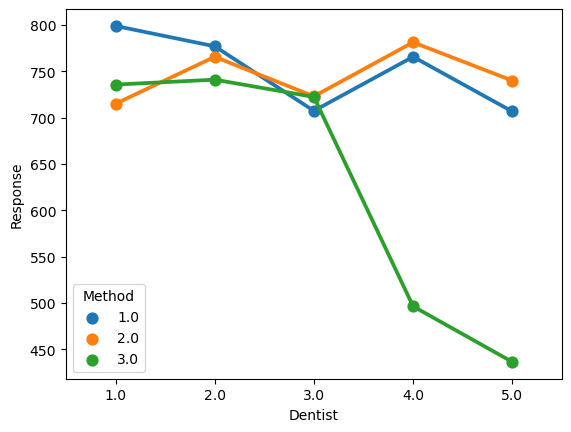

In [476]:
sns.pointplot(x='Dentist', y='Response', data=Alloy1, hue='Method', ci=None);

### Insights:
- Interaction between Dentist 1 and Method 1 has the highest response rate.
- Dentist 5 with Method 3 has the least response rate.
- Overall, method  3  has  the lesser response  rate when compared with other methods.
- Method 2 has the higher response rate with dentist 2


### ii) Alloy 2:

In [477]:
Alloy2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45 entries, 3 to 89
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Dentist   45 non-null     category
 1   Method    45 non-null     category
 2   Alloy     45 non-null     float64 
 3   Temp      45 non-null     category
 4   Response  45 non-null     float64 
dtypes: category(3), float64(2)
memory usage: 1.7 KB


In [478]:
Alloy2.head(3)

,Dentist,Method,Alloy,Temp,Response
3,1.0,1.0,2.0,1500.0,907.0
4,1.0,1.0,2.0,1600.0,792.0
5,1.0,1.0,2.0,1700.0,835.0


In [479]:
Alloy2.Dentist.value_counts()

1.0    9
2.0    9
3.0    9
4.0    9
5.0    9
Name: Dentist, dtype: int64

In [480]:
Alloy2.Method.value_counts()

1.0    15
2.0    15
3.0    15
Name: Method, dtype: int64

In [481]:
# Two Way Anova
formula = 'Response ~ C(Dentist) + C(Method)'
model = ols(formula, Alloy2).fit()
aov_table = anova_lm(model)
print(aov_table)

              df         sum_sq        mean_sq          F    PR(>F)
C(Dentist)   4.0   56797.911111   14199.477778   0.926215  0.458933
C(Method)    2.0  499640.400000  249820.200000  16.295479  0.000008
Residual    38.0  582564.488889   15330.644444        NaN       NaN


In [482]:
# Two Way Anova with interaction plot
formula = 'Response ~ C(Dentist) + C(Method) + C(Dentist):C(Method)'
model = ols(formula, Alloy2).fit()
aov_table = anova_lm(model)
print(aov_table)

                        df         sum_sq        mean_sq          F    PR(>F)
C(Dentist)             4.0   56797.911111   14199.477778   1.106152  0.371833
C(Method)              2.0  499640.400000  249820.200000  19.461218  0.000004
C(Dentist):C(Method)   8.0  197459.822222   24682.477778   1.922787  0.093234
Residual              30.0  385104.666667   12836.822222        NaN       NaN


### a) As the p value (0.371833) of Dentists > α, we Fail to Reject the null hypothesis. i.e., for Alloy 2 type, there is NO effect of Dentists on the implant hardness.


### b) As the p value (0.000004) of Methods < α, we can Reject the null hypothesis. i.e., for Alloy 2 type, there is effect of Methods on the implant hardness.


### c) As the p value (0.093234) of Methods > α, we Fail to Reject the null hypothesis. i.e., for Alloy2  type,  there is  NO interaction  between  Dentists  and Methods on the implant hardness. 


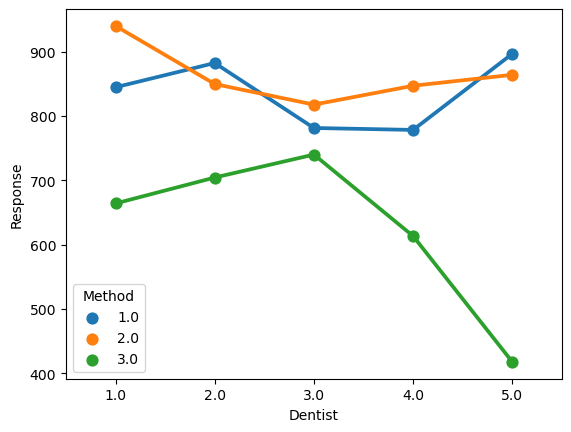

In [483]:
sns.pointplot(x='Dentist', y='Response', data=Alloy2, hue='Method', ci=None);

### Insights:
- Interaction between Dentist 1 with Method 2 has the highest response rate.
- Dentist 5 with Method 3 has the least response rate.
- Overall, method  3  has  the lesser response  rate when compared with other methods.
- Among Dentists with Method 1, dentist 5 has the higher response rate.


## 7.7) Ans:

### i) Alloy 1:

### Two Way Anova without interaction

In [484]:
# Two Way Anova without interaction
formula = 'Response ~ C(Dentist) + C(Method)'
model = ols(formula, Alloy1).fit()
aov_table = anova_lm(model)
print(aov_table)

              df         sum_sq       mean_sq         F    PR(>F)
C(Dentist)   4.0  106683.688889  26670.922222  2.591255  0.051875
C(Method)    2.0  148472.177778  74236.088889  7.212522  0.002211
Residual    38.0  391121.377778  10292.667836       NaN       NaN


### a
Ho = There is NO difference among the dentists on the implant hardness.

Ha = There is difference among the dentists on the implant hardness.

### As p value 0.051875 > α, we Fail to Reject the null hypothesis. Therefore, there is NO difference among the dentists on the implant hardness for Alloy 1 type (no interaction).

### b
Ho = There is NO difference among the Methods on the implant hardness.

Ha = There is difference among the Methods on the implant hardness.

### As p value 0.002211 < α, we should Reject the null hypothesis. Therefore, there is difference among the Methods on the implant hardness for Alloy 1 type (no interaction).

### Two Way Anova with interaction

In [485]:
# Two Way Anova with interaction
formula = 'Response ~ C(Dentist) + C(Method) + C(Dentist):C(Method)'
model = ols(formula, Alloy1).fit()
aov_table = anova_lm(model)
print(aov_table)

                        df         sum_sq       mean_sq          F    PR(>F)
C(Dentist)             4.0  106683.688889  26670.922222   3.899638  0.011484
C(Method)              2.0  148472.177778  74236.088889  10.854287  0.000284
C(Dentist):C(Method)   8.0  185941.377778  23242.672222   3.398383  0.006793
Residual              30.0  205180.000000   6839.333333        NaN       NaN


### a
Ho = There is NO difference among the dentists on the implant hardness.

Ha = There is difference among the dentists on the implant hardness.

### As p value 0.011484 < α, we should Reject the null hypothesis. Therefore, there is difference among the dentists on the implant hardness for Alloy 1 type.

### b
Ho = There is NO difference among the Methods on the implant hardness.

Ha = There is difference among the Methods on the implant hardness.

### As p value 0.000284 < α, we should Reject the null hypothesis. Therefore, there is difference among the Methods on the implant hardness for Alloy 1 type.

### c
Ho = There is NO difference among the interaction levels on the implant hardness.

Ha = There is difference among the interaction levels on the implant hardness.

### As p value 0.006793 < α, we should Reject the null hypothesis. Therefore, there is difference among the interaction levels on the implant hardness for Alloy 1 type.

### ii) Alloy 2:

### Two Way Anova without interaction

In [486]:
# Two Way Anova without interaction
formula = 'Response ~ C(Dentist) + C(Method)'
model = ols(formula, Alloy2).fit()
aov_table = anova_lm(model)
print(aov_table)

              df         sum_sq        mean_sq          F    PR(>F)
C(Dentist)   4.0   56797.911111   14199.477778   0.926215  0.458933
C(Method)    2.0  499640.400000  249820.200000  16.295479  0.000008
Residual    38.0  582564.488889   15330.644444        NaN       NaN


### a
Ho = There is NO difference among the dentists on the implant hardness.

Ha = There is difference among the dentists on the implant hardness.

### As p value 0.458933 > α, we Fail to Reject the null hypothesis. Therefore, there is NO difference among the dentists on the implant hardness for Alloy 2 type. (no interaction)

### b
Ho = There is NO difference among the Methods on the implant hardness.

Ha = There is difference among the Methods on the implant hardness.

### As p value 0.000008 < α, we should Reject the null hypothesis. Therefore, there is difference among the Methods on the implant hardness for Alloy 2 type (no interaction).

### Two Way Anova with interaction

In [487]:
# Two Way Anova
formula = 'Response ~ C(Dentist) + C(Method) + C(Dentist):C(Method)'
model = ols(formula, Alloy2).fit()
aov_table = anova_lm(model)
print(aov_table)

                        df         sum_sq        mean_sq          F    PR(>F)
C(Dentist)             4.0   56797.911111   14199.477778   1.106152  0.371833
C(Method)              2.0  499640.400000  249820.200000  19.461218  0.000004
C(Dentist):C(Method)   8.0  197459.822222   24682.477778   1.922787  0.093234
Residual              30.0  385104.666667   12836.822222        NaN       NaN


### a
Ho = There is NO difference among the dentists on the implant hardness.

Ha = There is difference among the dentists on the implant hardness.

### As p value 0.371833 > α, we Fail to Reject the null hypothesis. Therefore, There is NO difference among the dentists on the implant hardness for Alloy 2 type.

### b
Ho = There is NO difference among the Methods on the implant hardness.

Ha = There is difference among the Methods on the implant hardness.

### As p value 0.000004 < α, we should Reject the null hypothesis. Therefore, there is difference among the Methods on the implant hardness for Alloy 2 type.

### c
Ho = There is NO difference among the interaction levels on the implant hardness.

Ha = There is difference among the interaction levels on the implant hardness.

### As p value 0.093234 > α, we Fail to Reject the null hypothesis. Therefore, there is NO difference among the interaction levels on the implant hardness. for Alloy 2 type.